# Potential	causes	of	repetition	and	dropout	in	Primary	Education	covering	      Primary	1	(P1)	to	Primary	6	(P6)

## Problem Statement
Education at all levels has been undergoing a tremendous amount of change over the last several years. There was a time when the only way to access information was by sifting through books in a library. Today, a student can obtain an encyclopedia's worth of information with a few clicks of a mouse. Companies like Coursera, Udacity, and Khan Academy are democratizing education, while universities are rethinking the traditional approach and incorporating technology to diversify their offerings. The importance of education in today's world has become undeniable and every country and continent is trying to provide its youth with a good level of education.   
In Rwanda however, we are assisting to a high rate of repetition and dropout especially in Primary Education. The aim of this project is to try and understand what the causes of such a phenomenon might be and then find suitable ways to attend to that problem.

## Exploring the data

This dataset has been collected by a company in Rwanda named Laterite for a project on Primary Education for the Ministry of Education (MINEDUC).	

In [62]:
# Import libraries
import numpy as np
import pandas as pd
import math
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("laterite_education_data.csv")
print("Education data read successfully!")

Education data read successfully!


In [63]:
student_data.head(5)

,Unnamed: 0,province,district,ur2012,weight,Consumption,s1q1,s1q3y,s1q13,s1q14,...,s4aq9,s4aq11h,s4aq12,s4aq14,s4aq15,s4aq17,s4bq3,s4bq4,s4bq5,s6aq2
0,8,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Female,17,No,No,...,NaN,NaN,NaN,NaN,NaN,Cost,Yes,Yes,Yes,No
1,9,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,16,"Yes,but residing in onother household",Yes and resident in household,...,No problem,NaN,Mother,7.0,Holidays,NaN,Yes,Yes,Yes,No
2,10,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,6,"Yes,but residing in onother household",Yes and resident in household,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,11,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,8,"Yes,but residing in onother household",Yes and resident in household,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,22,Kigali City,Nyarugenge,Peri urban,28.083333,529295.5,Female,17,No,Yes and resident in household,...,Not enough teachers,NaN,Mother,7.0,Holidays,NaN,Yes,Yes,Yes,No


In [64]:
del student_data['Unnamed: 0']  # Delete the first column

# Preparing the data
### Renaming columns
The columns' names of the dataset are not very intuitive so they need to be renamed to much more intuitive names

In [65]:
column_names = ['province', 'district', 'sector', 'weight', 'Consumption', 'sex', 'age', 'living_father', 'living_mother', 'health_problem', 'grade_2012', 'grade_2013', 'school', 'school_problem', 'edu_expenses', 'guardian', 'missed_school_count', 'reason_missed', 'reason_leave', 'can_read',  'can_write', 'can_calculate', 'farm_worker']
student_data.columns = column_names

To get more sense of the meaning of each variable, please take a look at the variables dictionary attached with this project.

In [66]:
student_data.columns

Index([u'province', u'district', u'sector', u'weight', u'Consumption', u'sex',
       u'age', u'living_father', u'living_mother', u'health_problem',
       u'grade_2012', u'grade_2013', u'school', u'school_problem',
       u'edu_expenses', u'guardian', u'missed_school_count', u'reason_missed',
       u'reason_leave', u'can_read', u'can_write', u'can_calculate',
       u'farm_worker'],
      dtype='object')

In [420]:
student_data.head()

,province,district,sector,weight,Consumption,sex,age,living_father,living_mother,health_problem,...,school_problem,edu_expenses,guardian,missed_school_count,reason_missed,reason_leave,can_read,can_write,can_calculate,farm_worker
0,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Female,17,No,No,No,...,NaN,NaN,NaN,NaN,NaN,Cost,Yes,Yes,Yes,No
1,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,16,"Yes,but residing in onother household",Yes and resident in household,No,...,No problem,NaN,Mother,7.0,Holidays,NaN,Yes,Yes,Yes,No
2,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,6,"Yes,but residing in onother household",Yes and resident in household,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,8,"Yes,but residing in onother household",Yes and resident in household,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,Kigali City,Nyarugenge,Peri urban,28.083333,529295.5,Female,17,No,Yes and resident in household,No,...,Not enough teachers,NaN,Mother,7.0,Holidays,NaN,Yes,Yes,Yes,No


In [143]:
# The number of observations in the dataset is 3799
len(student_data)

3799

### Number of students in each class in 2012

In [68]:
student_data.groupby('grade_2012').size().sort_values(ascending=False)

grade_2012
Not in class      742
Primary 1         686
Primary 2         470
Primary 3         392
Primary 4         305
Primary 5         260
Pre-primary       170
Primary 6,7,8     147
Secondary 1        86
Secondary 2        53
Secondary 3        17
Secondary 4         6
Post primary 1      5
Post primary 3      2
Secondary 5         1
Post primary 5      1
Post primary 4      1
Secondary 6         1
dtype: int64

### Number of students in each class in 2013

In [69]:
student_data.groupby('grade_2013').size().sort_values(ascending=False)

grade_2013
Primary 1             718
Primary 2             518
Not in class          498
Primary 3             411
Primary 4             359
Primary 5             295
Primary 6,7,8         187
Secondary 1           112
Secondary 2            88
Pre-primary            82
Secondary 3            43
Secondary 4            15
Secondary 5             6
Post primary 1          5
Post primary 2          4
Post primary 6,7,8      1
Post primary 5          1
Post primary 4          1
Secondary 6             1
dtype: int64

In [196]:
in_school_2012 = student_data.index[(student_data['grade_2012'] != 'Not in class')]

## Computing Dummy Variables
Let's create dummy variables for grade repetition and dropout outcomes and call them “repeated” and “dropout”.

** Grade repetition is	defined	as:	Being	in	school	in	2012	and	2013,	and	being	in	the	same	grade	in	2012	and	2013.

** Dropout	is	defined	as:	Being	in	school	in	2012	but	leaving	school	in	2013	without	completing	secondary	school.

In [146]:
repeated = []
t = -1
for i in student_data['grade_2012']:
    t += 1
    try:
        np.isnan(np.array(i))
        repeated.append(0)
    except:
        if i == 'Not in class':
            repeated.append(0)
        elif i == student_data['grade_2013'][t]:
            repeated.append(1)
        else:
            repeated.append(0)

In [150]:
dropout = []
t = -1
for i in student_data['grade_2013']:
    t += 1
    try:
        np.isnan(np.array(i))
        dropout.append(0)
    except:
        try:
            np.isnan(np.array(student_data['grade_2012'][t]))
            dropout.append(0)
        except:
            if i == 'Not in class' and student_data['grade_2012'][t] != 'Not in class': 
                dropout.append(1)
            else:
                dropout.append(0)

### Overall Dropout rate

In [156]:
# Dropout rate in percent
np.mean(dropout)*100

3.395630429060279

### Overall Repetition rate

In [157]:
# Repetition rate in percent
np.mean(repeated)*100

15.31982100552777

### Adding the dummy variables to the original dataset

In [261]:
mat1 = pd.DataFrame(np.array(repeated), columns=['repeated'])
mat2 = pd.DataFrame(np.array(dropout), columns=['dropout'])

In [422]:
df = student_data.join(mat1)
df = df.join(mat2)
df.head(5)

,province,district,sector,weight,Consumption,sex,age,living_father,living_mother,health_problem,...,guardian,missed_school_count,reason_missed,reason_leave,can_read,can_write,can_calculate,farm_worker,repeated,dropout
0,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Female,17,No,No,No,...,NaN,NaN,NaN,Cost,Yes,Yes,Yes,No,0,0
1,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,16,"Yes,but residing in onother household",Yes and resident in household,No,...,Mother,7.0,Holidays,NaN,Yes,Yes,Yes,No,1,0
2,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,6,"Yes,but residing in onother household",Yes and resident in household,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
3,Kigali City,Nyarugenge,Peri urban,28.083333,215962.0,Male,8,"Yes,but residing in onother household",Yes and resident in household,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
4,Kigali City,Nyarugenge,Peri urban,28.083333,529295.5,Female,17,No,Yes and resident in household,No,...,Mother,7.0,Holidays,NaN,Yes,Yes,Yes,No,0,0


# Grade repetition vs Grade in Primary Education
Let's take a look at how grade repetition varies by grade in the Primary Education in Rwanda  

## Plot of Students in class in primary

In [282]:
indices = filter(lambda x:str(df.loc[x]['grade_2012']).startswith("Prima"), df.index)
df1 = df.loc[indices]
indices = filter(lambda x:str(df.loc[x]['grade_2012']).startswith("Prima") and df.loc[x]['repeated'], df.index)
df1_repeated = df.loc[indices]
indices = filter(lambda x:str(df.loc[x]['grade_2012']).startswith("Prima") and df.loc[x]['dropout'], df.index)
df1_dropout = df.loc[indices]

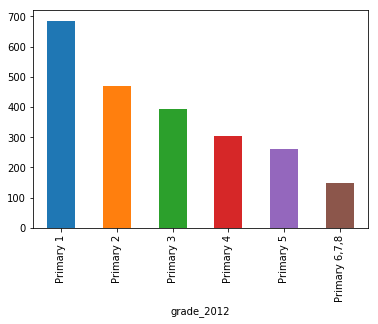

In [269]:
%matplotlib inline
df1.groupby('grade_2012').size().sort_values(ascending=False).plot.bar()

### The plot above is showing how many students there are in Primary1 Primary2, etc.  Its purpose is to allow us to see the proportion of students that repeat or dropout in Primary school when we compare it to the 2 plots below which show the number of repeats and dropout in primary.

## Plot of Repeats in primary

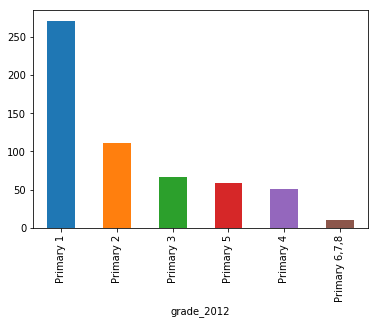

In [270]:
df1_repeated.groupby('grade_2012').size().sort_values(ascending=False).plot.bar()

### We can notice from the plot above that about a third of students from each primary school class repeats 

## Plot of Dropout in primary

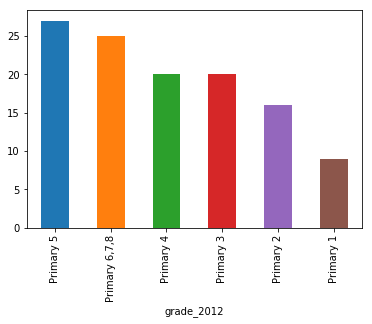

In [271]:
df1_dropout.groupby('grade_2012').size().sort_values(ascending=False).plot.bar()

### The plot above shows us that very few students dropout as compared to the number of students that repeat or the total number of students. For primary 1 it is a little above 25 here

## Dropout rates by gender

In [309]:
# Male dropouts
indices = filter(lambda x: df1['sex'][x].strip().lower() == 'male' and df1.loc[x]['dropout'], df1.index)
df1_dropout_male = df1.loc[indices]

# Female dropouts
indices = filter(lambda x: df1['sex'][x].strip().lower() == 'female' and df1.loc[x]['dropout'], df1.index)
df1_dropout_female = df1.loc[indices]

In [310]:
# Male dropouts
# df_dropout_male.describe()
float(df1_dropout_male.shape[0])*100/df1.shape[0]

2.6106194690265485

In [311]:
# Female dropouts
# df_dropout_female.describe()
float(df1_dropout_female.shape[0])*100/df1.shape[0]

2.566371681415929

### As we can see there seems to be a difference in the dropout rates by	gender	for	the	population	of	students	in	Primary	Education	in	2012 but is that difference statistically significant ? Let's find out

## Plot of Dropout of males in primary

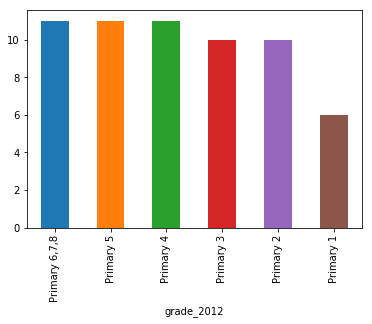

In [312]:
%matplotlib inline
df1_dropout_male.groupby('grade_2012').size().sort_values(ascending=False).plot.bar()

## Plot of Dropout of females in primary

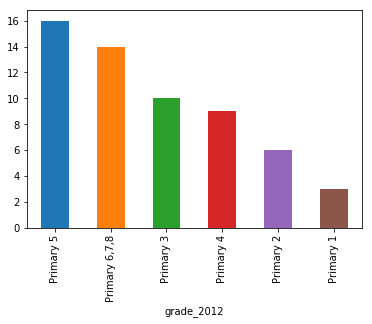

In [313]:
%matplotlib inline
df1_dropout_female.groupby('grade_2012').size().sort_values(ascending=False).plot.bar()

### Assuming a significance level of 0.05, let's compute the t-test statistic and p-value

In [318]:
indices = filter(lambda x: df1['sex'][x].strip().lower() == 'male', df1.index)
df1_males = df1.loc[indices]

indices = filter(lambda x: df1['sex'][x].strip().lower() == 'female', df1.index)
df1_females = df1.loc[indices]

In [323]:
# Let's assume a significance level of 0.05
import scipy
from scipy import stats
scipy.stats.ttest_ind(df1_males['dropout'], df1_females['dropout'])

Ttest_indResult(statistic=0.37998202037533024, pvalue=0.7039944980872941)

### Since the pvalue here is much greater than 0.05 (or 5 percent), it can be concluded that there is no difference between the two populations (male and female primary school students). 
### Another way of viewing this is : to say that there is a difference is taking a 70.4 percent risk of being wrong since we have a pvalue of 0.704

# Good Predictors
Let's now try and find out the variables in our dataset that can be good predictors of whether a student would repeat the same grade in 2012 and 2013

### Plot by sector  -  just curious :) 

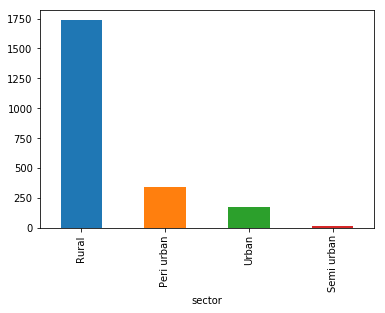

In [364]:
df1.groupby('sector').size().sort_values(ascending=False).plot.bar()

### Preprocessing of Feature Columns
As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no. These can be reasonably converted into 1/0 (binary) values.

Other columns, like living_father and living_mother, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. 'living_father_Yes,but residing in onother household', 'living_mother_Do not know', etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. The code cell below performs the preprocessing routine discussed in this section.

In [365]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(df1)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (168 total features):
['province_Eastern Province', 'province_Kigali City', 'province_Northern Province', 'province_Southern Province', 'province_Western Province', 'district_Bugesera', 'district_Burera', 'district_Gakenke', 'district_Gasabo', 'district_Gatsibo', 'district_Gicumbi', 'district_Gisagara', 'district_Huye', 'district_Kamonyi', 'district_Karongi', 'district_Kayonza', 'district_Kicukiro', 'district_Kirehe', 'district_Muhanga', 'district_Musanze', 'district_Ngoma', 'district_Ngororero', 'district_Nyabihu', 'district_Nyagatare', 'district_Nyamagabe', 'district_Nyamasheke', 'district_Nyanza', 'district_Nyarugenge', 'district_Nyaruguru', 'district_Rubavu', 'district_Ruhango', 'district_Rulindo', 'district_Rusizi', 'district_Rutsiro', 'district_Rwamagana', 'sector_Peri urban', 'sector_Rural', 'sector_Semi urban', 'sector_Urban', 'weight', 'Consumption', 'sex_Female', 'sex_Male', 'age', 'living_father_Dont know', 'living_father_No', 'living_father_Yes,and

In [366]:
# Extract feature columns
feature_cols = list(X_all.columns[:-2])

# Extract target column 'repeated'
target_col = X_all.columns[-2] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
x_all = X_all[feature_cols]
y_all = X_all[target_col]

# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (x_all.head())

Feature columns:
['province_Eastern Province', 'province_Kigali City', 'province_Northern Province', 'province_Southern Province', 'province_Western Province', 'district_Bugesera', 'district_Burera', 'district_Gakenke', 'district_Gasabo', 'district_Gatsibo', 'district_Gicumbi', 'district_Gisagara', 'district_Huye', 'district_Kamonyi', 'district_Karongi', 'district_Kayonza', 'district_Kicukiro', 'district_Kirehe', 'district_Muhanga', 'district_Musanze', 'district_Ngoma', 'district_Ngororero', 'district_Nyabihu', 'district_Nyagatare', 'district_Nyamagabe', 'district_Nyamasheke', 'district_Nyanza', 'district_Nyarugenge', 'district_Nyaruguru', 'district_Rubavu', 'district_Ruhango', 'district_Rulindo', 'district_Rusizi', 'district_Rutsiro', 'district_Rwamagana', 'sector_Peri urban', 'sector_Rural', 'sector_Semi urban', 'sector_Urban', 'weight', 'Consumption', 'sex_Female', 'sex_Male', 'age', 'living_father_Dont know', 'living_father_No', 'living_father_Yes,and residing in the household', 'l

In [368]:
from sklearn.cross_validation import train_test_split

# Set the number of training points
num_train = len(x_all)*.7

# Set the number of testing points
num_test = len(x_all)*.3

# Shuffle and split the dataset into the number of training and testing points above
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=float(num_test)/X_all.shape[0], random_state=0)

# Show the results of the split
print ("Training set has {} samples.".format(x_train.shape[0]))
print ("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 1582 samples.
Testing set has 678 samples.


## Prediction

In [370]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(np.nan_to_num(x_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [372]:
# Make predictions using the testing set
y_pred = regr.predict(np.nan_to_num(x_test))

## Printing out all the coefficients along with the R-square

In [374]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


('Coefficients: \n', array([-2.51640611e+01, -8.29189514e+05, -2.25910561e+05, -3.26690876e+05,
        1.01708174e+05, -1.90135586e+05,  3.57497553e+04,  3.57498052e+04,
        6.39028728e+05, -1.90135627e+05,  3.57497532e+04,  1.36530113e+05,
        1.36530092e+05,  1.36530074e+05, -2.91868997e+05, -1.90135532e+05,
        6.39028692e+05, -1.90135580e+05,  1.36530139e+05,  3.57497304e+04,
       -1.90135646e+05, -2.91868901e+05, -2.91868976e+05, -1.90135602e+05,
        1.36530095e+05, -2.91869013e+05,  1.36530123e+05,  6.39028692e+05,
        1.36530067e+05, -2.91868937e+05,  1.36530099e+05,  3.57497279e+04,
       -2.91869049e+05, -2.91868937e+05, -1.90135612e+05, -1.13785807e+01,
       -1.13946650e+01, -1.14237557e+01, -1.13435663e+01, -1.19438715e-04,
        3.72529030e-09,  1.02098695e+00,  1.04927819e+00, -3.18242134e-03,
        3.99896096e+00,  3.93838304e+00,  3.87768719e+00,  3.89503060e+00,
       -7.18262666e-01, -6.97146751e-01, -6.81325203e-01, -7.16956006e-01,
    

## Printing out the 30 biggest positive coefficients

In [418]:
for i in sorted(regr.coef_, reverse=True)[:30]:
    idx = list(regr.coef_).index(i)
    print feature_cols[idx], i

district_Gasabo 639028.7275450855
district_Nyarugenge 639028.6920003718
district_Kicukiro 639028.6919958376
district_Muhanga 136530.1390110495
district_Nyanza 136530.12277507264
district_Gisagara 136530.11307777843
district_Ruhango 136530.0986810122
district_Nyamagabe 136530.09459006222
district_Huye 136530.0915714224
district_Kamonyi 136530.0742229697
district_Nyaruguru 136530.06675741856
province_Western Province 101708.17366634632
district_Gakenke 35749.80515371742
district_Burera 35749.75527218791
district_Gicumbi 35749.75323124234
district_Musanze 35749.73039749972
district_Rulindo 35749.72790873266
can_calculate_No 6.117983883104898
can_calculate_Yes 6.098885614475876
living_father_Dont know 3.9989609599656433
living_father_No 3.9383830430015223
living_father_Yes,but residing in onother household 3.8950306024053134
living_father_Yes,and residing in the household 3.877687188454729
reason_missed_Dropped out 2.7670329020729696
farm_worker_No 1.8483785299758893
grade_2012_Primary 5 1

## Printing out the 30 biggest negative coefficients

In [419]:
for i in sorted(regr.coef_)[:30]:
    idx = list(regr.coef_).index(i)
    print feature_cols[idx], i

province_Kigali City -829189.5143508213
province_Southern Province -326690.87615554803
district_Rusizi -291869.04916496354
district_Nyamasheke -291869.0129039013
district_Karongi -291868.9974055473
district_Nyabihu -291868.97612739523
district_Rutsiro -291868.93707330525
district_Rubavu -291868.93679588794
district_Ngororero -291868.9010052779
province_Northern Province -225910.5612133158
district_Ngoma -190135.64620240396
district_Gatsibo -190135.62677161302
district_Rwamagana -190135.61222849396
district_Nyagatare -190135.60245394625
district_Bugesera -190135.58566105226
district_Kirehe -190135.57967882536
district_Kayonza -190135.53173351559
province_Eastern Province -25.16406106146411
sector_Semi urban -11.42375574788457
sector_Rural -11.394664995215862
sector_Peri urban -11.378580729926398
sector_Urban -11.343566341212863
health_problem_No -7.949486239507678
health_problem_Yes -7.939172845566645
can_read_No -6.03557957164594
grade_2013_Primary 6,7,8 -5.098809037473984
grade_2013_S

### These values of coefficients seem to show that variables related to locality like province, district or sector, play a big role even more so than other variables like living_father, living_mother which is a bit counter-intuitive. One could easily think that having a stable home would be more important for a student's academic success than the province where the student lives. But then again, maybe there are just not enough good schools in certain localities

### The R-square is too low,  I could remedy to that by finding the right set of variables to use in a stepwise way but there is no guarantee this will really help. For difficult problems, even a low R-square might not mean the results are not reliable

### Strengths and Weaknesses of the dataset

# Strengths
* It has enough variables
* It is based on a recent survey
*  Data are collected in a non-interventional way and therefore reflect ‘real life’

# Limitations
* Too much missing values
* Too small dataset
* Results may be biased because of the size of the dataset